In [3]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
subj = 'subj001'
in_path = f'../data/interim/PairwiseDecoding/{subj}'
files = sorted(glob(f'{in_path}/*.npy'))

In [22]:
rdm = []
for f in files:
    rdm.append(np.load(f))
average_rdm = np.nanmean(rdm,axis=0)

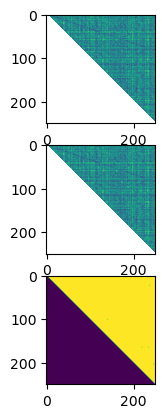

In [33]:
_,ax = plt.subplots(3)
ax[0].imshow(average_rdm[:,:,0])
ax[1].imshow(average_rdm[:,:,1])
ax[2].imshow(average_rdm[:,:,0] == average_rdm[:,:,1])

In [44]:
i, c = np.unique(rdm[0][row_idx,col_idx,0] == rdm[1][row_idx,col_idx,0], return_counts=True)
print(i, c)

[False  True] [18017 13108]
